## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import itertools






In [ ]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [ ]:
missings = data.isnull().sum()
print(missings)

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


In [ ]:
data = data.dropna()
missings = data.isnull().sum()
print(missings)

Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64


In [ ]:
print(data['Species'].unique())
print(data['Island'].unique())
print(data['Clutch Completion'].unique())
print(data['Sex'].unique())

['Chinstrap' 'Gentoo' 'Adelie']
['Dream' 'Biscoe' 'Torgersen']
['Yes' 'No']
['MALE' 'FEMALE' '.']


In [ ]:
dt = data[data['Sex'] != '.']
print(dt['Species'].unique())
print(dt['Island'].unique())
print(dt['Clutch Completion'].unique())
print(dt['Sex'].unique())

['Chinstrap' 'Gentoo' 'Adelie']
['Dream' 'Biscoe' 'Torgersen']
['Yes' 'No']
['MALE' 'FEMALE']


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [ ]:
species_encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
dt.loc[:, 'Species'] = species_encoder.fit_transform(dt[['Species']]).astype(int)

dt.loc[:, 'Clutch Completion'] = (dt['Clutch Completion'] == 'Yes').astype(int)
dt.loc[:, 'Sex'] = (dt['Sex'] == 'MALE').astype(int)

dt = pd.get_dummies(dt, columns=['Island'], drop_first=False).astype(int)

dt.head()


,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,0,1,382,50,19,196,3550,1,10,-24,0,1,0
1,0,1,741,45,17,198,3950,0,8,-24,0,1,0
2,1,1,744,46,13,210,4550,0,7,-25,1,0,0
3,0,1,10,45,16,191,3250,0,9,-24,0,1,0
4,1,1,13,48,14,203,4625,0,8,-26,1,0,0


Целевую категориальную переменную Species закодируем с помощью OrdinalEncoder. Для пола и кладки удобно применить двоичное кодирование (0 и 1). Для островов сделаем отдельные столбцы с указанием: 1 если отсров был указан изначально строке и 0 если не был указан. Так в каждой строке в столбцах с отровами будет только одна 1.

In [ ]:
X = dt.drop(columns=['Species'])
y = dt['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (226, 12)
X_test: (98, 12)
y_train: (226,)
y_test: (98,)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
X_train_filtered = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_filtered = X_test[['Flipper Length (mm)', 'Body Mass (g)']]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

n_neighbors = [1, 3, 5, 10, 15, 25]

results = []

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_train_predict = knn.predict(X_train_scaled)
    y_test_predict = knn.predict(X_test_scaled)
    train_score = accuracy_score(y_train, y_train_predict)
    test_score = accuracy_score(y_test, y_test_predict)
    results.append({
        'N': i,
        'Train': train_score,
        'Test': test_score
    })
res_dt = pd.DataFrame(results)
res_dt

,N,Train,Test
0,1,0.960177,0.806122
1,3,0.840708,0.785714
2,5,0.831858,0.775510
3,10,0.800885,0.846939
4,15,0.814159,0.826531
5,25,0.800885,0.806122


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

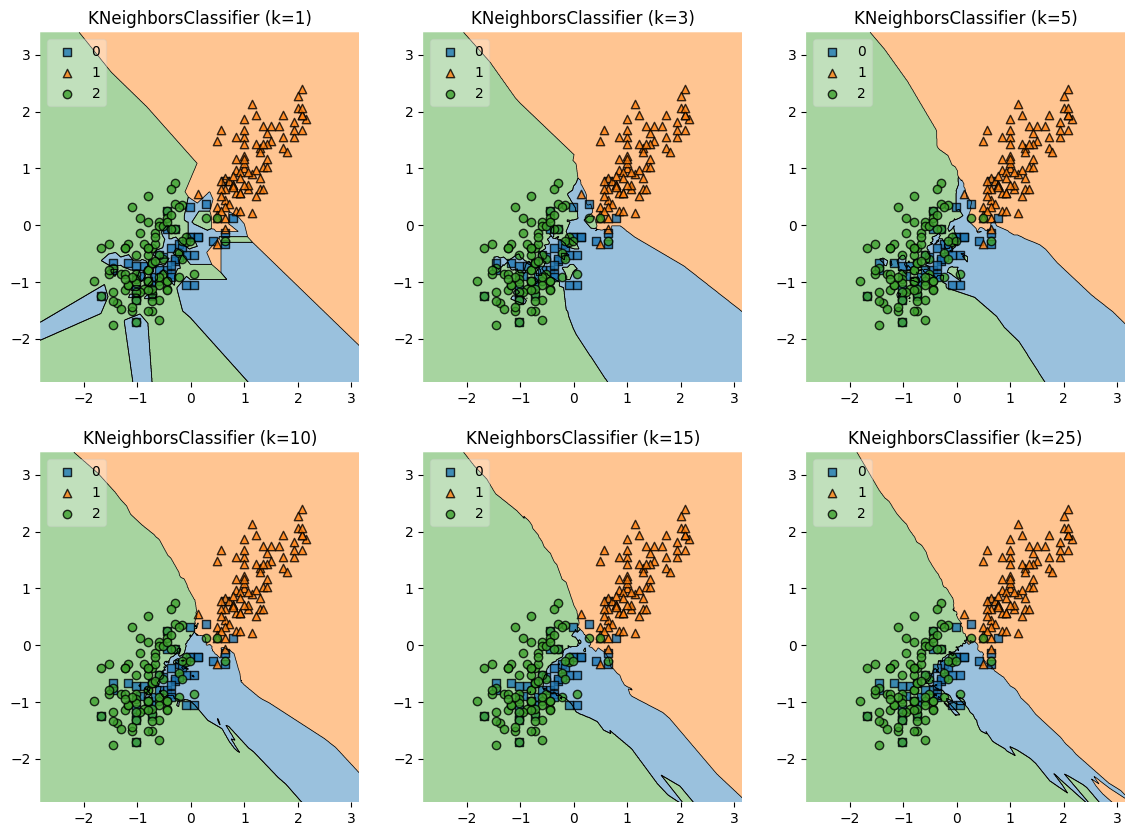

In [ ]:
from mlxtend.plotting import plot_decision_regions

classificators = []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classificators.append(knn)

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(14, 10))

titles = [f"KNeighborsClassifier (k={i})" for i in n_neighbors]
cells = itertools.product([0, 1], [0, 1, 2])
for clsf, title, (row, col) in zip(classificators, titles, cells):
    ax = plt.subplot(gs[row, col])
    plot_decision_regions(X=X_train_scaled, y=y_train.values, clf=clsf, legend=2, ax=ax)
    plt.title(title)

# plt.tight_layout()
plt.show()

# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

По пунктам 1.3 и 1.5 оптимально брать k = 10, так как на на тестовой выборке при таком значении достигается наилучшая точчность, а на графиках имеет относительно несильно изрезанные края. К переобучению можно отнести k = 1, 3, 5, так как на тесте точность сильно проседает в сравнении с обучающей выборкой.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

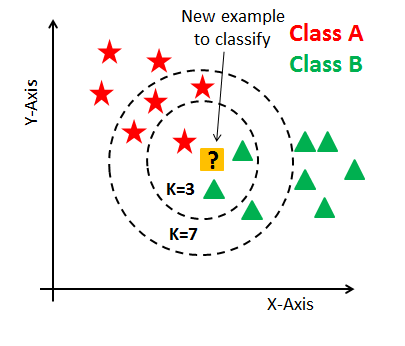

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k
      self.X_train = None
      self.y_train = None

    def fit(self, X, y):
      self.X_train = np.array(X)
      self.y_train = np.array(y)

    def predict(self, X):
      X = np.array(X)
      dists = self.count_distance(X, self.X_train)
      k_id = np.argpartition(dists, self.k, axis=1)[:, :self.k]
      k_nearest = self.y_train[k_id]
      return np.array([Counter(neigh_value).most_common(1)[0][0] for neigh_value in k_nearest])

    def count_distance(self, X, y):
      return np.linalg.norm(X[:, np.newaxis] - y, axis=2)


In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
k = [1, 3, 5, 10, 15, 25]

best_score = 0
best_k = 0

for k_i in k:
    knn = KNN(k=k_i)
    knn.fit(X_train_scaled, y_train)
    y_predict = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_predict)
    if score > best_score:
        best_score = score
        best_k = k_i

print(f"Лучшее k: {best_k} с точностью {best_score:0.4f} на test")



Лучшее k: 10 с точностью 0.8367 на test


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
bdata = pd.read_csv('diamonds.csv')
bdata.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
missings = bdata.isnull().sum()
print(missings)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
bdata = bdata.drop(columns=['Unnamed: 0'])
bdata

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [ ]:
import seaborn as sns

bdata_only_num = bdata[bdata.select_dtypes(include=['float64', 'int64']).columns]

corr_matrix_bdata = bdata_only_num.corr()
corr_matrix_bdata


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшая корреляция целевой переменной (price) с carat, x, y, я (в порядке убывания), что довольно логично.

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [ ]:
bdata = pd.get_dummies(bdata, columns=['cut', 'color', 'clarity'], drop_first=False)
bdata

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = bdata.drop(columns=['price'])
y = bdata['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [ ]:
sings = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[sings] = scaler.fit_transform(X_train_scaled[sings])

X_test_scaled = X_test.copy()
X_test_scaled[sings] = scaler.transform(X_test_scaled[sings])

После масштабирование коэффициент $w_i$ показывает изменение $X_i$ приизменении коэффициента на 1 стандартное отклонение. Это изменяет интерпретацию коэффициентов. Они становятся сопостовимы по величине, а это позволяет оценить относительную важность признаков за счёт $w_i$. Так как чем больше модуль этого значения тем более значим признак для предсказание (его изменение сильнее меняет целевую переменную).

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m1 = LinearRegression()
m1.fit(X_train_scaled, y_train)

y_train_predict = m1.predict(X_train_scaled)

y_test_predict = m1.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
print(f"train: {mse_train}")
print(f"test: {mse_test}")

train: 1283859.068354082
test: 1261612.9574434077


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coefs = m1.coef_
all_sings = X_train_scaled.columns
coef_bdata = pd.DataFrame({
    'Признак': all_sings,
    'Коэффициент': coefs
})
coef_bdata = coef_bdata.sort_values(by='Коэффициент', ascending=False, key=abs)

coef_bdata

,Признак,Коэффициент
0,carat,5279.547975
18,clarity_I1,-3843.345343
17,color_J,-1529.082162
19,clarity_IF,1505.375352
24,clarity_VVS1,1184.634592
25,clarity_VVS2,1163.771445
21,clarity_SI2,-1107.908773
3,x,-1075.771486
11,color_D,815.412997
22,clarity_VS1,781.678751


Среди признаков по коэффициентам выделяется carat, также можно взять во внимание и clarity.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

coef_bdata['Lasso'] = lasso.coef_
coef_bdata['Ridge'] = ridge.coef_
coef_bdata

,Признак,Коэффициент,Lasso,Ridge
0,carat,5279.547975,4799.897045,5240.478726
18,clarity_I1,-3843.345343,-106.302894,-94.799051
17,color_J,-1529.082162,-85.520173,-66.198218
19,clarity_IF,1505.375352,-665.352758,-1034.829549
24,clarity_VVS1,1184.634592,-0.000000,-1.076508
25,clarity_VVS2,1163.771445,-32.416115,-32.489166
21,clarity_SI2,-1107.908773,-465.873590,-611.538618
3,x,-1075.771486,-17.875363,18.557445
11,color_D,815.412997,81.699250,254.353289
22,clarity_VS1,781.678751,0.000000,187.789713


Мультиколлинеарность не исчезла, так как карат бриллианта зависит от других параметров (размер, чистота и тп). Регуляризация с данными параметрами не исправила проблему.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


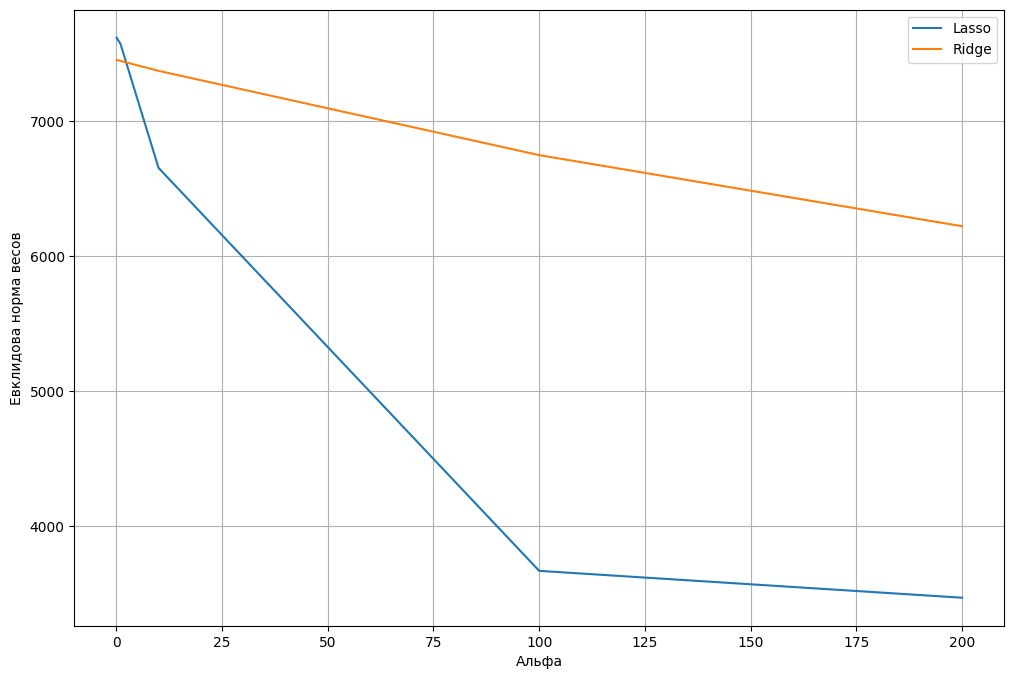

In [ ]:
alpha = [0.1, 1, 10, 100, 200]
lasso_list = []
ridge_list = []

for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    lasso_list.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    ridge_list.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(12, 8))
plt.plot(alpha, lasso_list, label='Lasso')
plt.plot(alpha, ridge_list, label='Ridge')
plt.xlabel('Альфа')
plt.ylabel('Евклидова норма весов')
plt.legend()
plt.grid()
plt.show()

Лассо силььнее уменьшает коэффициенты. Она хорошо помогает выделить признаки.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alpha, cv=5, random_state=52)
lasso_cv.fit(X_train_scaled, y_train)

mean_mse = lasso_cv.mse_path_.mean(axis=1)
cv_res = pd.DataFrame({
    'Альфа': lasso_cv.alphas_,
    'Среднее MSE': mean_mse
})
cv_res

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


,Альфа,Среднее MSE
0,200.0,2.446895e+06
1,100.0,2.240122e+06
2,10.0,1.324939e+06
3,1.0,1.288647e+06
4,0.1,1.288422e+06


In [ ]:
print(f"Наибольшее качество при alpha: {lasso_cv.alpha_}")

Наибольшее качество при alpha: 0.1


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
best_a = 0.1
best_lasso = Lasso(alpha=best_a)
best_lasso.fit(X_train_scaled, y_train)
coef_bdata['Lasso (best)'] = best_lasso.coef_
coef_bdata[['Признак', 'Lasso (best)']]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


,Признак,Lasso (best)
0,carat,5274.807570
18,clarity_I1,-96.396452
17,color_J,-66.004466
19,clarity_IF,-1071.011007
24,clarity_VVS1,-0.000000
25,clarity_VVS2,-28.716041
21,clarity_SI2,-756.192142
3,x,-129.797870
11,color_D,103.596767
22,clarity_VS1,37.468679


Самый информативный признак это carat, что хорошо согласуется с действительностью, так как он зависит от множества остальных признаков и в основном и определяет цену алмаза.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
y_predict_lasso = best_lasso.predict(X_test_scaled)
y_predict_line = m1.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_predict_lasso)
mse_line = mean_squared_error(y_test, y_predict_line)

print(f"Lasso MSE: {mse_lasso:0.2f}")
print(f"Line MSE: {mse_line:0.2f}")

Lasso MSE: 1261704.23
Line MSE: 1261612.96


Обычная линейная регрессия оказалась немного лучше.